# Лабораторная работа 1. Методы сортировки

### Вариант: **13**

## Bogosort (Болотная сортировка)

Значение названия: 

- (от амер. комп. жарг. bogus — неработоспособный, нефункциональный, бесполезный)

Другие названия:

- Болотная сортировка
- Stupid Sort

### Классификация алгоритма:

- По типу алгоритма: непрактичная сортировка

- По устойчивости: неустойчивый

- По месту хранения данных: на месте

- По выделению дополнительного пространства: сортировка на месте

- По дополнительным затратам памяти: $O(1)$
   
- Время выполнения: 
  
  - В худшем случае: $∞$
  
  - В лучшем случае: $O(n)$
  
  - В среднем: $O(n*n!)$

### Описание алгоритма:

Bogosort — неэффективный алгоритм сортировки, используемый только в образовательных целях и противопоставляемый другим, более реалистичным алгоритмам.

Если bogosort использовать для сортировки колоды карт, то сначала в алгоритме нужно проверить, лежат ли все карты по порядку, и если не лежат, то случайным образом перемешать её, проверить лежат ли теперь все карты по порядку, и повторять процесс, пока не отсортируется колода.

Это вероятностный алгоритм. Количество возможных перестановок структуры данных из n элементов равно n!, поэтому потребуется в среднем n! перемешиваний, чтобы прийти к решению. Каждое перемешивание занимает n операций, так что общее среднее количество операций равно n * n!
Поскольку его характеристики полностью зависят от вероятности, сложность наихудшего случая не поддается измерению.

### Блок-схема алгоритма

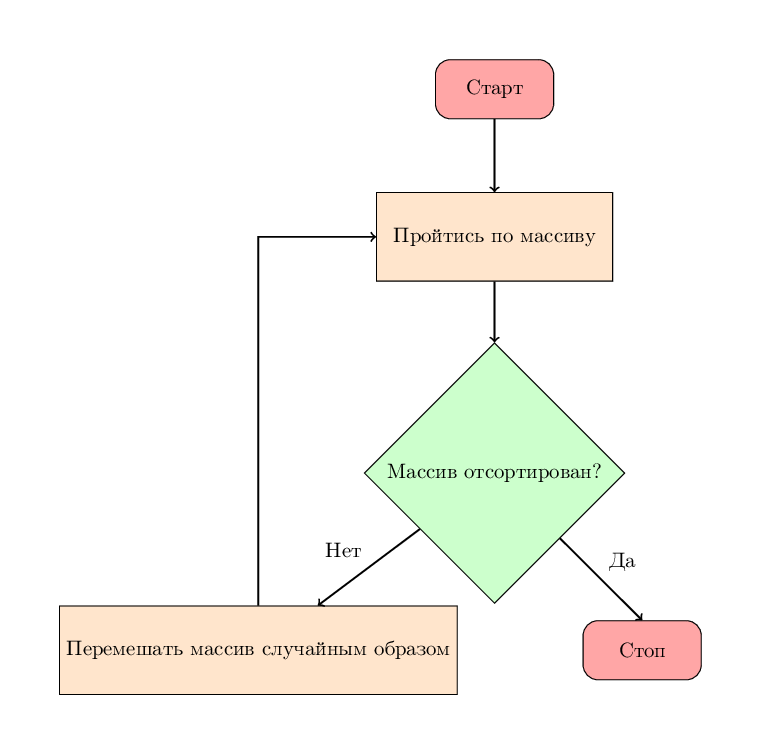

In [2]:
from wand.image import Image as WImage
blockscheme = WImage(filename='img/lab01_blockscheme.pdf', 
                     resolution=150)
blockscheme

### Псевдокод алгоритма

```
is_sorted = False
WHILE is_sorted == False
    FOR i FROM 0 TO LENGTH(A)-2
        IF A[i] > A[i + 1]
            is_sorted = True
            RETURN
    FOR i FROM 0 TO LENGTH(A)-1
        r = RANDOM_INT FROM 0 TO LENGTH(A)-1
        SWAP A[i] AND A[r]
```

### Реализация алгоритма

Достоинства алгоритма:
    
- *Ненулевая* вероятность "мгновенно" отсортировать массив любого размера
    
Недостатки алгоритма:

- Непрактичность
- Низкая предсказуемость временн*ы*х затрат в рамках одной сортировки

In [3]:
import random

def bogosort(a):
    while (is_sorted(a) == False):
        shuffle(a)
    return a

def is_sorted(a):
    for i in range(0, len(a) - 1):
        if (a[i] > a[i + 1]):
            return False
    return True

def shuffle(a):
    for i in range(len(a)):
        r = random.randint(0, len(a) - 1)
        a[i], a[r] = a[r], a[i]  # Swap


### Трассировка перемешивания

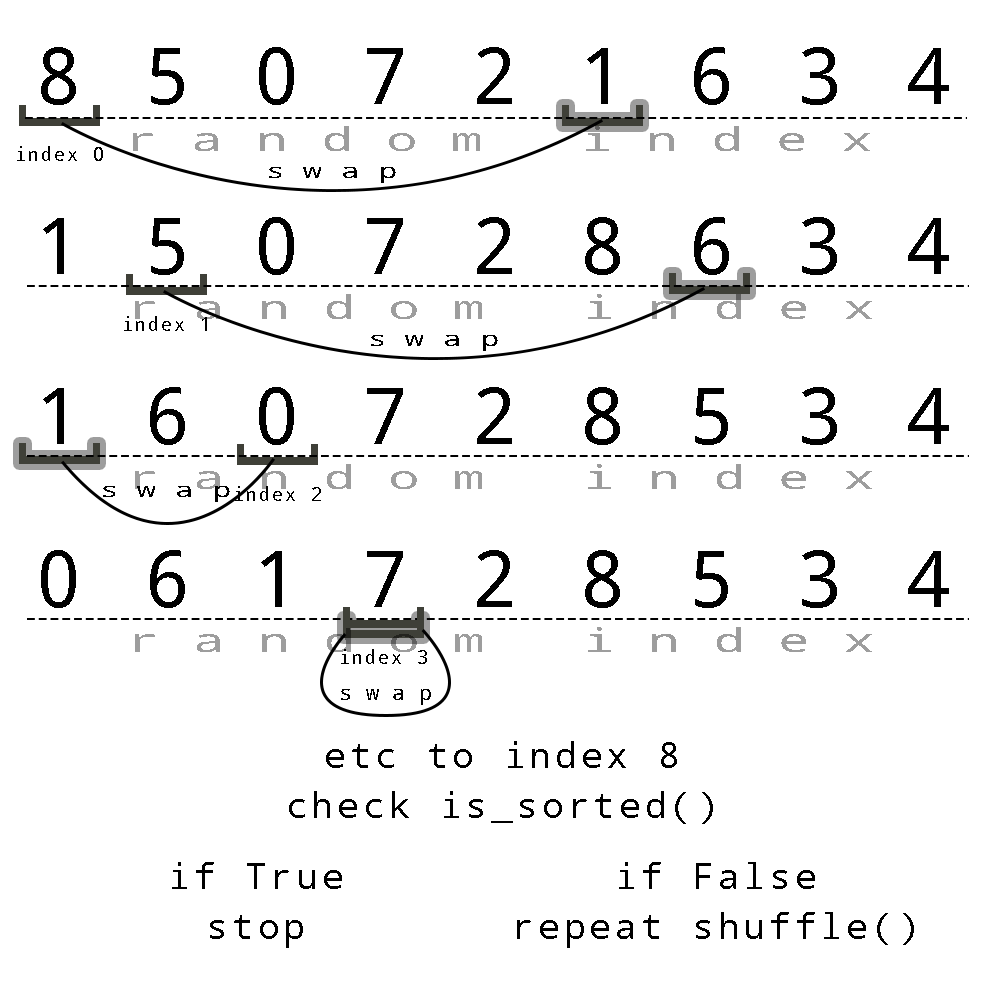

In [4]:
from wand.image import Image as WImage
tracingscheme = WImage(filename='img/lab01_tracing.png')
tracingscheme

### Тестирование

In [5]:
### Тестирование программы

sortmethod = bogosort

assert sortmethod([1, 2, 3, 4]) == [1, 2, 3, 4], 'Ошибка при сортировке отсортированного массива'

assert sortmethod([4, 3, 2, 1]) == [1, 2, 3, 4], 'Ошибка при сортировке отсортированного в обратном порядке массива'

assert sortmethod([1, 3, 4, 2]) == [1, 2, 3, 4], 'Ошибка при сортировке произвольного массива'

assert sortmethod([1, 3, 1, 2]) == [1, 1, 2, 3], 'Ошибка при сортировке массива с повторящимися элементами'


In [6]:
# Набор данных для тестирования алгоритма

def get_sort_array(n:int)->tuple:
    '''Возвращает отсортированный массив'''
    return tuple(range(n))

def get_reverse_array(n:int)->tuple:
    '''Возвращает отсортированный в обратном порядке массив'''
    return tuple(range(n))[::-1]

def get_random_array(n:int)->tuple:
    '''Возвращает перемешанный массив'''
    return tuple(random.sample(range(n), n))


### Измерения

In [7]:
from time import perf_counter_ns


def get_average_time(a: tuple, n: int):
    """Провести серию измерений
        :param a: Сортируемые данные в кортеже
        :param n: Количество измерений в серии
        :return: Среднее арифметическое время выполнения одной сортировки в наносекундах
    """
    sortable = list(a).copy()
    sum_time = float(0)
    for _ in range(n):
        current_measurement_start = perf_counter_ns()
        sortmethod(sortable)
        current_measurement_time = perf_counter_ns() - current_measurement_start
        sum_time += current_measurement_time
    print('#', end='')
    return round(sum_time / n)
    

In [10]:
sizes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sample_num = 100  # выборка (сколько раз повторять каждую сортировку, чтобы нивелировать случайность)

measurements = {
    'sort': [],
    'reverse': [],
    'random': [],
}

print(('-' * (len(sizes) - 1) + '|') * 3)

for n in sizes:
    a = get_sort_array(n)
    average_time = get_average_time(a, sample_num)
    measurements['sort'].append(average_time)
    
for n in sizes:
    a = get_reverse_array(n)
    average_time = get_average_time(a, sample_num)
    measurements['reverse'].append(average_time)

for n in sizes:
    a = get_random_array(n)
    average_time = get_average_time(a, sample_num)
    measurements['random'].append(average_time)

print(' Done.', end='')


----------|----------|----------|
################################# Done.

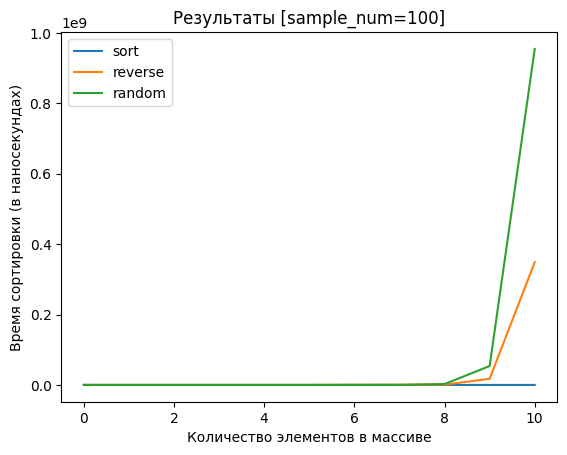

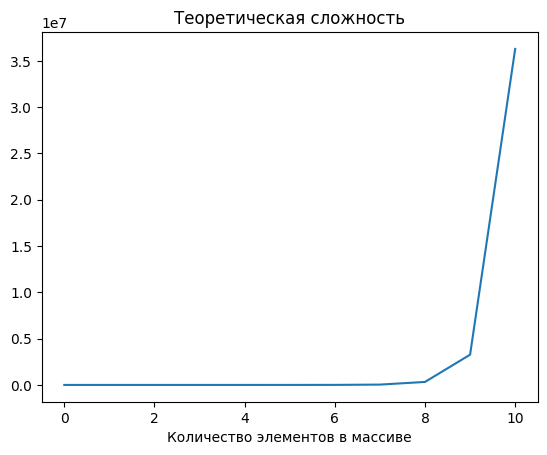

In [11]:
from matplotlib import pyplot as pp

for key in measurements.keys():
    pp.plot(sizes, measurements[key], label=key)
    pp.title(f'Результаты [sample_num={sample_num}]')
    pp.xlabel('Количество элементов в массиве')
    pp.ylabel('Время сортировки (в наносекундах)')
pp.legend()
pp.show()


from math import factorial as fact

difficulty = [x * fact(x) for x in sizes]
pp.plot(difficulty)
pp.title('Теоретическая сложность')
pp.xlabel('Количество элементов в массиве')
pp.show()

### Материалы

 - https://en.wikipedia.org/wiki/Bogosort

 - https://ru.wikipedia.org/wiki/Bogosort

 - https://habr.com/ru/post/198114/
 
 - https://sortvisualizer.com/bogosort/





8. Провести сравнение указанных алгоритмов сортировки массивов, содержащих n1, n2, n3 и n4 элементов. 
9. Каждую функцию сортировки вызывать трижды: для сортировки упорядоченного массива, массива, упорядоченного в обратном порядке и неупорядоченного массива. Сортируемая последовательность для всех методов должна быть одинаковой (сортировать копии одного массива). 
10. Проиллюстрировать эффективность алгоритмов сортировок по заданному критерию. Построить диаграммы указанных зависимостей.